# LFW - Labeled Faces in the Wild

Der __Labeled Faces in the Wild__ (LFW) Dataset ist ein öffentlich verfügbarer Bilddatensatz für Gesichtserkennung und -verifikation, der echte Bilder von Personen in realen Umgebungen enthält. Er wird häufig für die Evaluierung von Algorithmen im Bereich Gesichtserkennung und Face Verification genutzt.

Der LFW-Datensatz wurde speziell für Face Verification entwickelt, also um zu prüfen, ob zwei Bilder dieselbe Person zeigen oder nicht. Er wird aber auch für Face Recognition (Klassifikation von Gesichtern) und Face Clustering genutzt.

Der Labeled Faces in the Wild (LFW) Datensatz ist einer der wichtigsten Datensätze für Gesichtserkennung und -verifikation in realen Szenarien. Er stellt Modelle vor echte Herausforderungen durch unkontrollierte Bedingungen und dient als Benchmark für moderne Deep-Learning-Ansätze in der Gesichtserkennung.

### Hauptmerkmale des LFW Datensatzes

* Anzahl der Bilder: 13.233
* Anzahl der Personen: 5.749
* Bildquelle: Bilder wurden aus dem Internet gesammelt (z. B. Nachrichtenseiten)
* Bildgröße: 250×250 Pixel (Originalgröße)
* Farben: RGB
* Gesichtserkennungstyp: Ungefilterte, natürliche Bilder mit Variationen in Beleuchtung, Pose und Hintergrund

### Einlesen (und ggf. einmaliger Download) des Datensatzes

Die in `torchvision` angebotene Methode `LFWPeople` funktioniert leider nicht (mehr). `Scikit-learn` liefert nur eine Teilmenge des Datensatzes zurück.

Auf `kagglehub` kann man den kompletten Datensatz herunterladen (der Standardpfad wird durch die Umgebungsvariable `KAGGLE_DATA_DIR` definiert):

In [4]:
import os
os.environ['KAGGLE_DATA_DIR'] = './data'
wert = os.getenv('KAGGLE_DATA_DIR')
print(wert)

import kagglehub

path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

./data
Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\jessicali9530\lfw-dataset\versions\4


### Beispielbilder

In den Strukturen `training_data` und `test_data` befinden sich nun die Bilddaten und die dazugehörenden Labels.

#### Bildformat in PyTorch

`PyTorch` erwartet (farbige) Bilddaten als dreidimensionalen `Tensor`: Die drei Farbinformationen sind als drei übereinanderliegende Ebenen angeordnet. Normalerweise bestehen Bilddaten aus einem zweidiemnsionalen Array mit jeweils drei Farbwerten (RGB). Um zwischen diesen beiden Formaten zu wechseln, kann man die Methode `permute` verwenden, mit den die Dimensionen eines `Tensors` "vertauscht" werden.

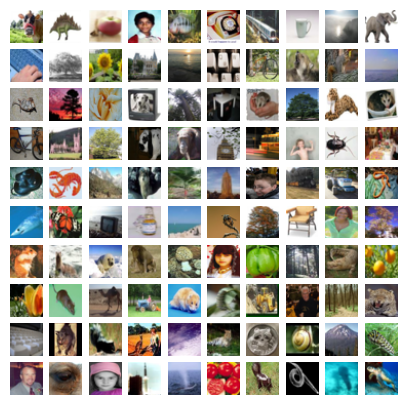

In [7]:
import matplotlib.pyplot as plt

rows, cols = 10,10

fig, axs = plt.subplots(rows, cols, figsize=(5,5))

for n, ax in enumerate(axs.flat):
    image, label = training_data[n]
    ax.imshow(image.permute(1,2,0))
    ax.axis('off')     

### Optional: Konvertierung der Daten in das YOLO-Format

 Danach befinden sich im Datenverzeichnis `cifar-100-python` fünf Batches mit je 10.000 Bildern zum Training (`data_batch_1` - `data_batch_5`) sowie eine weitere Datei zum Test (`text_batch`).



<div style="background-color: #ff3333; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>In Arbeit</strong></div>


In [23]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import ConcatDataset

def convert_data():  
    image_dir = f'./data/cifar-100/images'
    label_dir = f'./data/cifar-100/labels'
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)     
    combined_dataset = ConcatDataset([training_data, test_data])

    print(f'Konvertiere {len(combined_dataset)} Datensätze')
    for n, (data, label) in enumerate(combined_dataset):
        data = data.permute(0,1,2).numpy()        
        r, g, b = data[0], data[1],data[2]
        print(r.shape)
        rgb = np.stack([r, g, b], axis=-1)
        image = Image.fromarray(rgb, 'RGB')
        fname = f'{n+1:05}-{label}'
        image.save(f'{image_dir}/{fname}.png')

        with open(f'{label_dir}/{fname}.txt','w') as f:
            f.write(f"{label} 0.5 0.5 1.0 1.0\n")  

        break
    print(f'Konvertierung beendet')            

#convert_data()           

Konvertiere 60000 Datensätze
(32, 32)
Konvertierung beendet
